In [ ]:
#!pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [01:10<00:00, 44.1MB/s]
100% 2.70G/2.70G [01:10<00:00, 40.8MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128 , 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False  
)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128 , 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False  
)

Found 17572 files belonging to 38 classes.
Using 3514 files for validation.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
    print(x , x.shape)
    print(y , y.shape)
    break;

In [ ]:
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32 , kernel_size=3 , padding='same' , activation='relu' , input_shape=[128,128,3]))
model.add(Conv2D(filters=32 , kernel_size=3  , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [ ]:
model.add(Conv2D(filters=64 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=64 , kernel_size=3  , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [ ]:
model.add(Conv2D(filters=128 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=128 , kernel_size=3  , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [ ]:
model.add(Conv2D(filters=256 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=256 , kernel_size=3  , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [ ]:
model.add(Conv2D(filters=512 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=512 , kernel_size=3  , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500 , activation='relu'))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
model.add(Dense(units=38 , activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001) , loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [ ]:
training_history = model.fit(x=training_set , validation_data = validation_set , epochs=10)

Epoch 1/10
1758/1758 [==============================] - 134s 70ms/step - loss: 1.5902 - accuracy: 0.5371 - val_loss: 0.5856 - val_accuracy: 0.8167
Epoch 2/10
1758/1758 [==============================] - 118s 67ms/step - loss: 0.5587 - accuracy: 0.8250 - val_loss: 0.3331 - val_accuracy: 0.8967
Epoch 3/10
1758/1758 [==============================] - 119s 67ms/step - loss: 0.3280 - accuracy: 0.8946 - val_loss: 0.2165 - val_accuracy: 0.9280
Epoch 4/10
1758/1758 [==============================] - 119s 68ms/step - loss: 0.2239 - accuracy: 0.9282 - val_loss: 0.1881 - val_accuracy: 0.9417
Epoch 5/10
1758/1758 [==============================] - 119s 68ms/step - loss: 0.1634 - accuracy: 0.9464 - val_loss: 0.1820 - val_accuracy: 0.9431
Epoch 6/10
1758/1758 [==============================] - 118s 67ms/step - loss: 0.1327 - accuracy: 0.9570 - val_loss: 0.2175 - val_accuracy: 0.9337
Epoch 7/10
1758/1758 [==============================] - 119s 67ms/step - loss: 0.1051 - accuracy: 0.9652 - val_loss: 0

In [ ]:
train_loss , train_acc = model.evaluate(training_set)

1758/1758 [==============================] - 39s 22ms/step - loss: 0.0272 - accuracy: 0.9909


In [ ]:
print(train_loss , train_acc)

0.027188420295715332 0.9908599257469177


In [ ]:
val_loss , val_acc = model.evaluate(validation_set)

110/110 [==============================] - 3s 29ms/step - loss: 0.1602 - accuracy: 0.9556


In [ ]:
print(val_loss , val_acc)

0.16015170514583588 0.9556061625480652


In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

In [ ]:
#storing history in json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history , f)

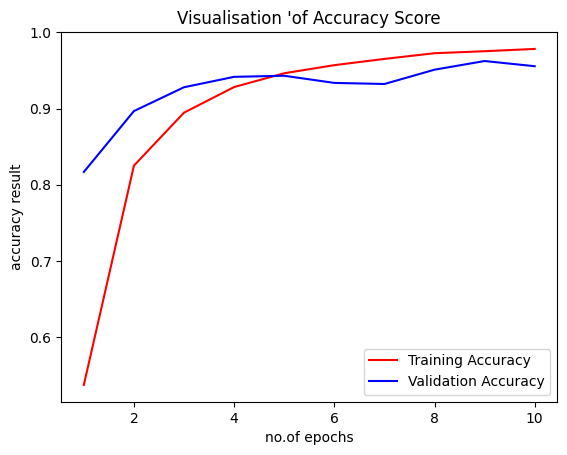

In [ ]:
# Accuracy visiualisation
epochs = [i for i in range(1,11)]
plt.plot(epochs , training_history.history['accuracy'] , color='red' , label = 'Training Accuracy')
plt.plot(epochs , training_history.history['val_accuracy'] , color='blue' , label = 'Validation Accuracy')
plt.xlabel("no.of epochs")
plt.ylabel("accuracy result")
plt.title("Visualisation 'of Accuracy Score")
plt.legend()
plt.show();

In [ ]:
# some other metrices for model evaluation
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
test_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
y_pred = model.predict(test_set)

17572/17572 [==============================] - 49s 3ms/step


In [ ]:
predicted_categories = tf.argmax(y_pred , axis=1)
predicted_categories , predicted_categories.shape

(<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>,
 TensorShape([17572]))

In [ ]:
true_categories = tf.concat([y for x,y in test_set] , axis =0)
true_categories , true_categories.shape

(<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>,
 TensorShape([17572, 38]))

In [ ]:
y_true = tf.argmax(true_categories , axis=1)
y_true , y_true.shape

(<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>,
 TensorShape([17572]))

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
print(classification_report(y_true , predicted_categories , target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.97      0.94       504
                                 Apple___Black_rot       0.93      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.99      0.93      0.95       502
                               Blueberry___healthy       0.99      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.94      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.93      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

In [ ]:
cm = confusion_matrix(y_true , predicted_categories)

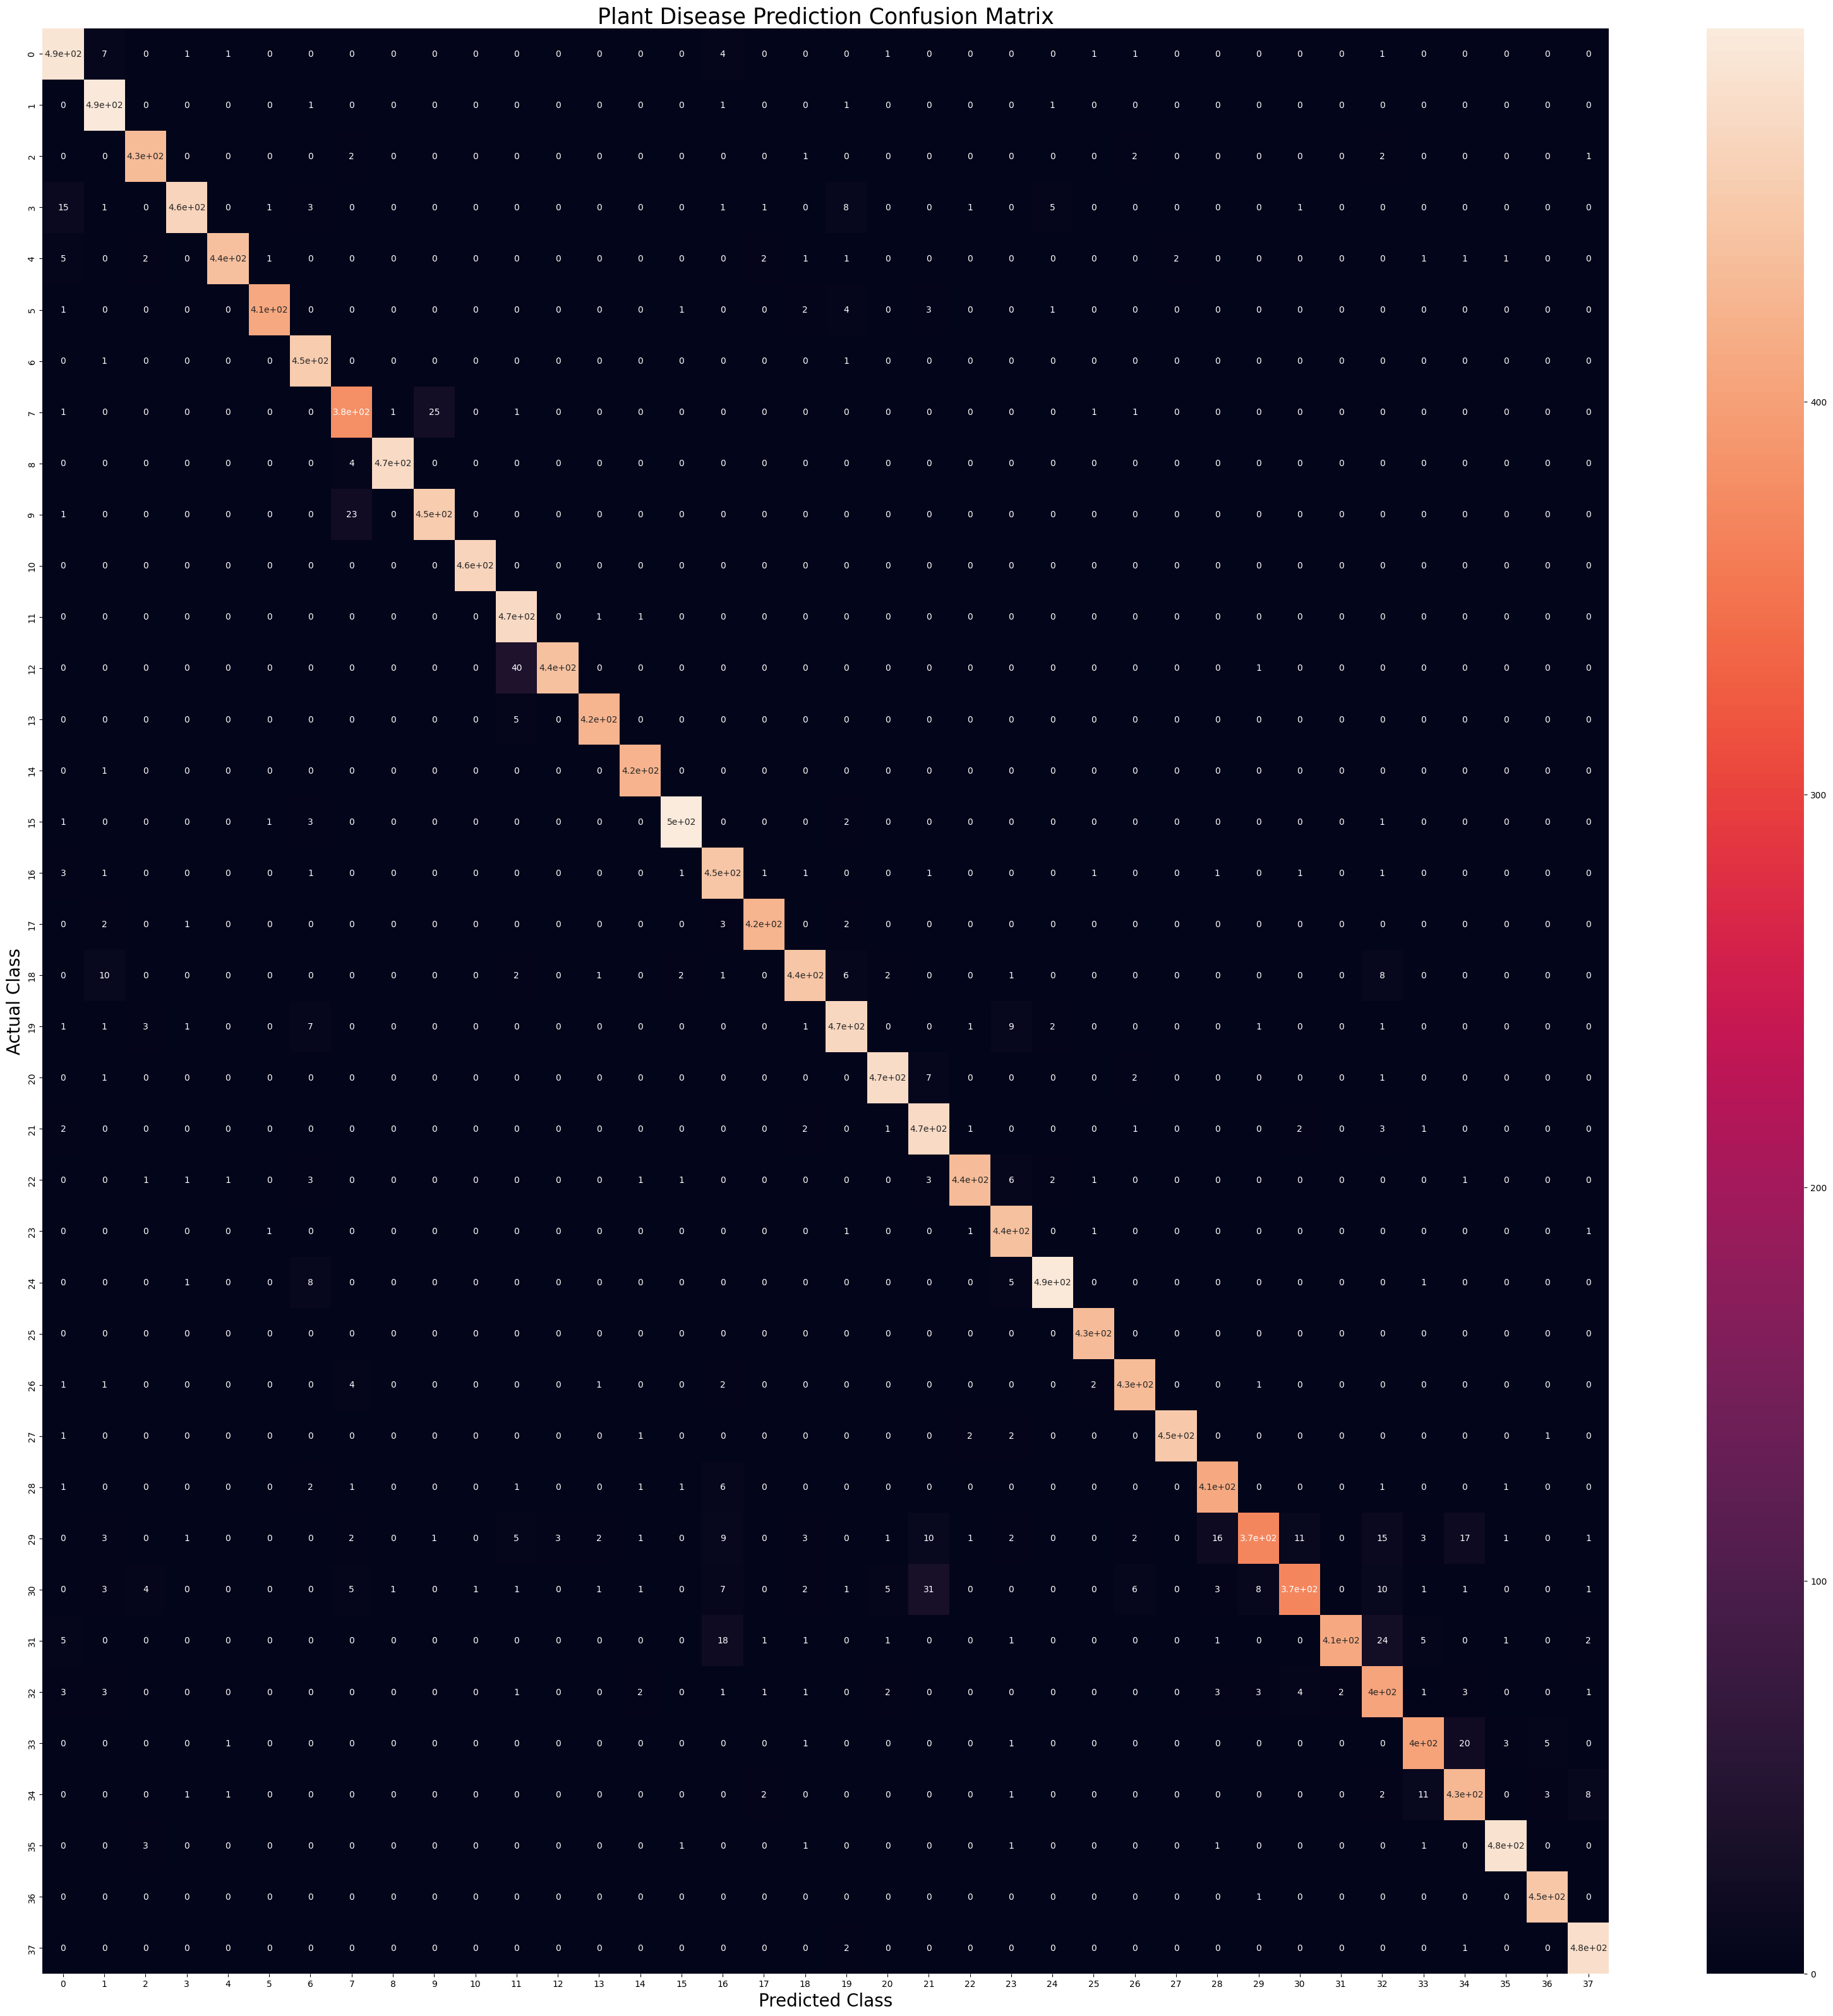

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()